<a href="https://colab.research.google.com/github/cartman12/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module3-dimensionality-reduction/Mohamad%20Ali%20Nasser%20-%20Mali%20-%20High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

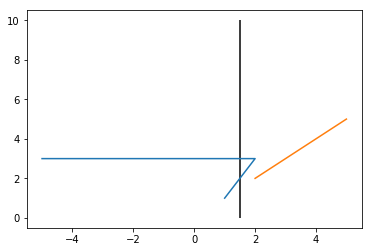

In [20]:
fail = np.array([[1,2],[2,3],[-5,5]])
passs = np.array([[1,2],[3,3],[3,5]])

plt.vlines(1.5,0, 10)

plt.plot(fail, passs)

plt.show()



## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because the x value has two ys.Which means its repeated x

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2

The other relations have an x that maps on more than one Y.  and relation 5 is a line.

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

for function m the dimensionality of the domain, is 3, and the output is the same.
For function n, the domain's dimensionality was 4, and the codomain was 2.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [0]:
# LSD haha

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

ANSWER:

\begin{align}
\\
Tp(\begin{bmatrix}\hat{i}_1 \\ \hat{j}_2 \end{bmatrix}) = \begin{bmatrix} 1 \ \ \  \ \  3 \\ -1 \ \ \ \ 2 \\  \end{bmatrix}
\\
Tq(\begin{bmatrix}\hat{i}_1 \\ \hat{j}_2 \\ \hat{k}_3\end{bmatrix}) = \begin{bmatrix} 4 \ \ \ \ \ \ \ 1 \ \ \ \ \ 2 \\-1\ \ \ \  \  2\ \ \ \  3 \\ 5 \ \ \ \  \ \ \  1 \ \ \  -2 \end{bmatrix}
\\
\end{align}

In [0]:
# so basically, we can do this without really applying any unit basis vector by hand, by simply reordering the coeficient of the xs on each row, mean 2X_2 3X_1 would have a Transformation veto of 3 2 , coef of x_1 first which is the 3 and then the 2 of x_2.

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [193]:
m = np.array([[10],
              [2]])
Tp = np.array([[1,3],
               [-1,2]])
result = Tp.dot(m)
result

array([[16],
       [-6]])

In [202]:
n = np.array([[10],
              [2],
             [2]])
Tq = np.array([[4,1,2],
               [-1,2,3],
              [5,1,-2]])
result = Tq.dot(n)
result

array([[46],
       [ 0],
       [48]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors are vectors that stay on the same line under a matrix transformation and basically stays the same, squishes or gets scaled. 
Eigenvalues are the value by how much the vector gets scaled or squished.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

complex and has redundant information

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

nrows >= 5 time the number of columns

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv', na_values = '?')

In [85]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [86]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [171]:
# Select the species as our target and capture itno a new DF
target = df[['species']]
target.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [0]:
columns = df.columns[:len(df.columns)-1]

In [185]:
# Create a DF with only the features
X =  df[columns]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [90]:
# Calcuate the mean of each column
means = np.mean(X.T, axis=1)
means

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [134]:
# center the columns by substracting the mean of each
centered_X = X - means
centered_X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


In [143]:
Tcovariance_X = np.cov(centered_X.T)
covariance_X

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [144]:
# Calculate the eigvalue and and vectors from the covariance
eigvalues, eigvectors = lin.eig(covariance_X)
eigvalues, eigvectors

(array([4.22484077, 0.24224357, 0.07852391, 0.02368303]),
 array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
        [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
        [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
        [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]]))

In [186]:
# get our PCS
P = pd.DataFrame(eigvectors.T.dot(centered_X.T)).T
P.head()


,0,1,2,3
0,-2.684207,-0.326607,-0.021512,0.001006
1,-2.715391,0.169557,-0.203521,0.099602
2,-2.889820,0.137346,0.024709,0.019305
3,-2.746437,0.311124,0.037672,-0.075955
4,-2.728593,-0.333925,0.096230,-0.063129


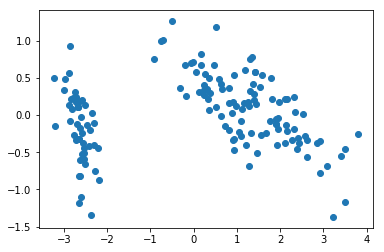

In [167]:
plt.scatter(P[0],P[1])
plt.show()

In [0]:
# lets calculate the PCA of two components using the PCA.fit method
from sklearn.decomposition import PCA
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(X)
# access values and vectors
# transform data
B = pd.DataFrame(pca.transform(X))
print("\n Projected Data: \n", B)

In [0]:
# rejoin the target data with the PCA, taking the first to columns, Not sure what the second columns are honestly.
reduced_df = pd.concat([P[P.columns[:2]], target],axis = 1)

In [0]:
target = df[['species']]
target.head()

In [180]:

reduced_df.head()

,0,1,species
0,-2.684207,-0.326607,setosa
1,-2.715391,0.169557,setosa
2,-2.889820,0.137346,setosa
3,-2.746437,0.311124,setosa
4,-2.728593,-0.333925,setosa


In [181]:
targets = target[target.columns[0]].unique()
targets

array(['setosa', 'versicolor', 'virginica'], dtype=object)

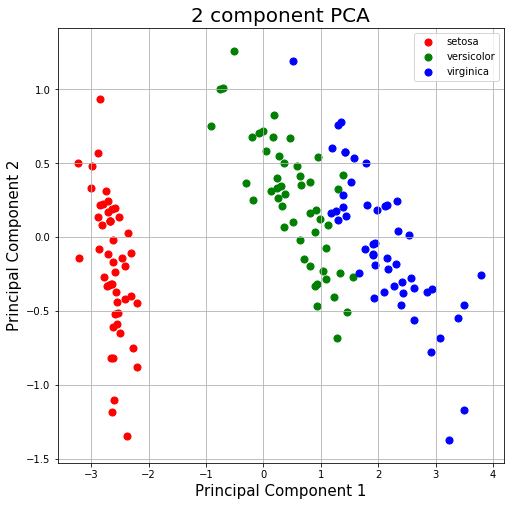

In [182]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = reduced_df['species'] == target
    ax.scatter(reduced_df.loc[indicesToKeep, 0]
               , reduced_df.loc[indicesToKeep, 1]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)